In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.pipeline import Pipeline
import sklearn.metrics as metrics

In [2]:
model = pd.read_csv('../dataset_diabetes/diabetic_data_modeling.csv')
model.head()

,Unnamed: 0,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,glyburide-metformin,change,diabetesMed,readmitted,age_range
0,0,0,0,[10-20),0,0,0,3,59,0,...,0,0,0,0,2,0,0,1,1,1
1,1,1,0,[20-30),0,0,0,2,11,5,...,1,0,0,0,0,0,1,1,0,2
2,2,0,1,[30-40),0,0,0,2,44,1,...,0,0,0,0,2,0,0,1,0,4
3,3,0,1,[40-50),0,0,0,1,51,0,...,1,0,0,0,1,0,0,1,0,5
4,4,0,1,[50-60),2,0,2,3,31,6,...,0,0,0,0,1,0,1,1,1,6


In [3]:
model.drop('Unnamed: 0', axis =1, inplace = True)

In [4]:
model.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'glimepiride', 'glipizide',
       'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin',
       'glyburide-metformin', 'change', 'diabetesMed', 'readmitted',
       'age_range'],
      dtype='object')

In [5]:
model.dtypes

race                         int64
gender                       int64
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                       int64
diag_2                       int64
diag_3                       int64
number_diagnoses             int64
max_glu_serum                int64
A1Cresult                    int64
metformin                    int64
repaglinide                  int64
nateglinide                  int64
glimepiride                  int64
glipizide                    int64
glyburide                    int64
pioglitazone                 int64
rosiglitazone                int64
insulin                      int64
glyburide-metformin 

In [6]:
X = model.drop(['readmitted', 'age'], axis=1)
y = model['readmitted']

__Baseline__

In [7]:
y.value_counts(normalize = True)

0    0.533768
1    0.466232
Name: readmitted, dtype: float64

__Train/Test Split__

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.20, random_state=123, stratify = y)

__Scaling of data__

In [9]:
# Instantiate.
ss = StandardScaler()

# Fit and transform.
X_train_sc = ss.fit_transform(X_train)

# Transform.
X_test_sc = ss.transform(X_test)

__Logistic Regression__

In [10]:
lr = LogisticRegression()

In [11]:
lr.fit(X_train_sc, y_train)

LogisticRegression()

__Eva`luation Metrics__

In [12]:
print(f'Training Accuracy Score: {lr.score(X_train_sc, y_train)}')
print(f'Testing Accuracy Score: {lr.score(X_test_sc, y_test)}')
print(f'Cross Validation Score: {cross_val_score(lr,X_train_sc,y_train).mean()}')

Training Accuracy Score: 0.6196504379087467
Testing Accuracy Score: 0.6151649584416908
Cross Validation Score: 0.6198161296144862


In [13]:
preds = lr.predict(X_test_sc)

In [14]:
# Generate confusion matrix.
confusion_matrix(y_test, preds)

array([[8241, 2227],
       [5320, 3823]])

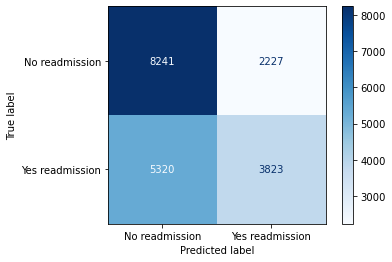

In [15]:
# Plot confusion matrix.
metrics.plot_confusion_matrix(lr, X_test_sc, y_test, cmap='Blues', 
                      values_format='d', display_labels=['No readmission', 'Yes readmission']);

__KNN Modeling__

In [16]:
# Instantiate and fit model
knn = KNeighborsClassifier()
knn.fit(X_train_sc, y_train)

KNeighborsClassifier()

In [17]:
print(f'Training Accuracy Score: {knn.score(X_train_sc, y_train)}')
print(f'Testing Accuracy Score: {knn.score(X_test_sc, y_test)}')
print(f'Cross Validation Score: {cross_val_score(knn,X_train_sc,y_train).mean()}')

Training Accuracy Score: 0.7208092706620263
Testing Accuracy Score: 0.5631533323134975
Cross Validation Score: 0.5658264897413646


In [18]:
preds_knn = knn.predict(X_test_sc)

In [19]:
# Generate confusion matrix.
confusion_matrix(y_test, preds_knn)

array([[6698, 3770],
       [4797, 4346]])

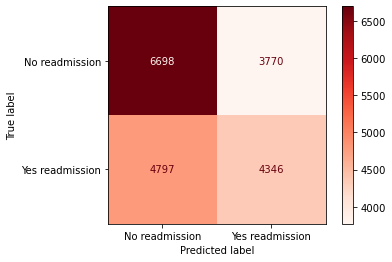

In [20]:
# Plot confusion matrix.
metrics.plot_confusion_matrix(knn, X_test_sc, y_test, cmap='Reds', 
                      values_format='d', display_labels=['No readmission', 'Yes readmission']);

__Random Forest__

In [23]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_sc, y_train)

RandomForestClassifier()

In [24]:
print(f'Training Accuracy Score: {rf.score(X_train_sc, y_train)}')
print(f'Testing Accuracy Score: {rf.score(X_test_sc, y_test)}')
print(f'Cross Validation Score: {cross_val_score(rf,X_train_sc,y_train).mean()}')

Training Accuracy Score: 0.9999872515648704
Testing Accuracy Score: 0.6211309979093366
Cross Validation Score: 0.6209125268895545


In [25]:
preds_rf = rf.predict(X_test_sc)

In [26]:
# Generate confusion matrix.
confusion_matrix(y_test, preds_rf)

array([[7506, 2962],
       [4468, 4675]])

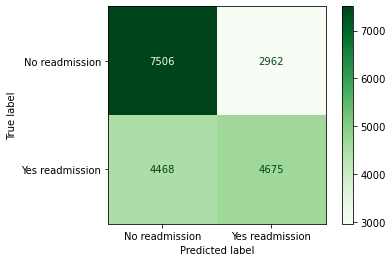

In [27]:
# Plot confusion matrix.
metrics.plot_confusion_matrix(rf, X_test_sc, y_test, cmap='Greens', 
                      values_format='d', display_labels=['No readmission', 'Yes readmission']);

__Most Important Features Using a Decision Tree__

In [28]:
# decision tree for feature importance on a regression problem
dt = DecisionTreeClassifier(max_depth = 25, criterion = "entropy", max_features=None, min_samples_split=5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=25, min_samples_split=5)

In [29]:
feature_names = X_train.columns

In [30]:
importance = rf.feature_importances_

In [31]:
most_imp_features = pd.DataFrame([f for f in zip(feature_names,importance)], columns=["Feature", "Importance"]).nlargest(10, "Importance")

In [32]:
most_imp_features 

,Feature,Importance
6,num_lab_procedures,0.121669
8,num_medications,0.104386
5,time_in_hospital,0.074028
14,diag_3,0.060201
12,diag_1,0.058300
30,age_range,0.058101
13,diag_2,0.056949
11,number_inpatient,0.055277
15,number_diagnoses,0.047731
7,num_procedures,0.047308


In [33]:
X_lm = model[['num_lab_procedures','num_medications','time_in_hospital','diag_2','diag_3','diag_1','age_range','number_inpatient','number_diagnoses','num_procedures']]
y_lm = model['readmitted']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_lm, y_lm, test_size =0.20, random_state=123, stratify = y)

In [35]:
# Instantiate.
ss = StandardScaler()
# Fit and transform.
X_train_sc = ss.fit_transform(X_train)
# Transform.
X_test_sc = ss.transform(X_test)

In [36]:
lr = LogisticRegression()
lr.fit(X_train_sc, y_train)

LogisticRegression()

In [37]:
print(f'Training Accuracy Score: {lr.score(X_train_sc, y_train)}')
print(f'Testing Accuracy Score: {lr.score(X_test_sc, y_test)}')
print(f'Cross Validation Score: {cross_val_score(lr,X_train_sc,y_train).mean()}')

Training Accuracy Score: 0.6108667661044607
Testing Accuracy Score: 0.605017592167661
Cross Validation Score: 0.6107647609811425


In [38]:
# Instantiate.
knn = KNeighborsClassifier()
knn.fit(X_train_sc, y_train)

KNeighborsClassifier()

In [39]:
print(f'Training Accuracy Score: {knn.score(X_train_sc, y_train)}')
print(f'Testing Accuracy Score: {knn.score(X_test_sc, y_test)}')
print(f'Cross Validation Score: {cross_val_score(knn,X_train_sc,y_train).mean()}')

Training Accuracy Score: 0.7161433434045971
Testing Accuracy Score: 0.5597878741522615
Cross Validation Score: 0.5631111148237076


In [41]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_sc, y_train)

RandomForestClassifier()

In [42]:
print(f'Training Accuracy Score: {rf.score(X_train_sc, y_train)}')
print(f'Testing Accuracy Score: {rf.score(X_test_sc, y_test)}')
print(f'Cross Validation Score: {cross_val_score(rf,X_train_sc,y_train).mean()}')

Training Accuracy Score: 0.9997960250379266
Testing Accuracy Score: 0.5955331191678139
Cross Validation Score: 0.5968434841120247


Scores got worse....

__Grid Search__